In [7]:
# first neural network with keras tutorial
import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from numpy import asarray
from numpy import unique
from numpy import argmax
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import plot_model


In [9]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [13]:
# load the dataset
dataset = loadtxt('Data/datas.csv', delimiter=',') 

In [15]:
# #ESSAI 3  -----OK
X = dataset[:,0:7]
y = dataset[:,7]
scalarX, scalarY = MinMaxScaler(feature_range=(0,0.75)), MinMaxScaler(feature_range=(0,0.75))
scalarX.fit(X)
scalarY.fit(y.reshape(94,1)) 
X = scalarX.transform(X)
y=np.array(y).reshape(94,1) 
y = scalarY.transform(y) 

In [17]:
print(y)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.71983935e-04]
 [2.18923901e-03]
 [4.74422103e-03]
 [8.22762667e-03]
 [1.23189629e-02]
 [1.77387289e-02]
 [2.42075523e-02]
 [3.08176139e-02]
 [3.95917972e-02]
 [4.92520136e-02]
 [5.97893942e-02]
 [7.09169107e-02]
 [8.20202916e-02]
 [9.185824

In [19]:
print(X)

[[0.         0.         0.         0.66412214 0.26923077 0.
  0.        ]
 [0.00806452 0.         0.         0.68702288 0.30769231 0.
  0.        ]
 [0.01612903 0.05769256 0.         0.68702288 0.38461538 0.06428571
  0.03191489]
 [0.02419355 0.05769256 0.         0.68702288 0.48076923 0.17142857
  0.07978723]
 [0.03225806 0.11538512 0.09036145 0.37786261 0.53846154 0.36428571
  0.28723404]
 [0.04032258 0.11538512 0.37951807 0.2977099  0.48076923 0.42857143
  0.35106383]
 [0.0483871  0.11538512 0.21686747 0.31488549 0.19230769 0.12857143
  0.11170213]
 [0.05645161 0.17307702 0.09036145 0.40648856 0.19230769 0.
  0.03191489]
 [0.06451613 0.17307702 0.04518072 0.38358776 0.32692308 0.15
  0.12765957]
 [0.07258065 0.23076958 0.         0.5381679  0.42307692 0.3
  0.2393617 ]
 [0.08064516 0.23076958 0.         0.48091599 0.5        0.42857143
  0.35106383]
 [0.08870968 0.23076958 0.         0.41793893 0.5        0.49285714
  0.41489362]
 [0.09677419 0.28846149 0.02710843 0.27480916 0.51923

In [21]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu')) #kernel_initializer='normal'
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #linear
print(model.summary())

H:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [25]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=60, batch_size=4, verbose=2, validation_split=0.20)

Epoch 1/60
19/19 - 1s - 29ms/step - loss: 0.0750 - val_loss: 0.6319
Epoch 2/60
19/19 - 0s - 2ms/step - loss: 0.0740 - val_loss: 0.6285
Epoch 3/60
19/19 - 0s - 2ms/step - loss: 0.0736 - val_loss: 0.6257
Epoch 4/60
19/19 - 0s - 2ms/step - loss: 0.0740 - val_loss: 0.6206
Epoch 5/60
19/19 - 0s - 2ms/step - loss: 0.0726 - val_loss: 0.6174
Epoch 6/60
19/19 - 0s - 2ms/step - loss: 0.0722 - val_loss: 0.6160
Epoch 7/60
19/19 - 0s - 2ms/step - loss: 0.0715 - val_loss: 0.6080
Epoch 8/60
19/19 - 0s - 2ms/step - loss: 0.0721 - val_loss: 0.5965
Epoch 9/60
19/19 - 0s - 2ms/step - loss: 0.0706 - val_loss: 0.6050
Epoch 10/60
19/19 - 0s - 2ms/step - loss: 0.0699 - val_loss: 0.5959
Epoch 11/60
19/19 - 0s - 2ms/step - loss: 0.0696 - val_loss: 0.5854
Epoch 12/60
19/19 - 0s - 2ms/step - loss: 0.0688 - val_loss: 0.5888
Epoch 13/60
19/19 - 0s - 2ms/step - loss: 0.0680 - val_loss: 0.5752
Epoch 14/60
19/19 - 0s - 2ms/step - loss: 0.0682 - val_loss: 0.5806
Epoch 15/60
19/19 - 0s - 2ms/step - loss: 0.0666 - val_l

In [26]:
# evaluate on test set
yhat = model.predict(X)
error = mean_absolute_error(y, yhat)
print('MAE: %.5f' % error)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
MAE: 0.06605


In [27]:
print(yhat) 

[[ 0.00336682]
 [ 0.00553632]
 [ 0.00437989]
 [ 0.00719467]
 [ 0.00677666]
 [ 0.00600518]
 [ 0.00337909]
 [ 0.00177365]
 [ 0.00562955]
 [ 0.00242475]
 [ 0.00550492]
 [ 0.0074371 ]
 [ 0.00588476]
 [ 0.00608368]
 [ 0.00592454]
 [ 0.00229497]
 [ 0.00639455]
 [ 0.00421714]
 [ 0.00470172]
 [ 0.00670858]
 [ 0.00311753]
 [ 0.0005581 ]
 [ 0.00085422]
 [ 0.00151872]
 [-0.00100603]
 [ 0.00116866]
 [ 0.00454571]
 [ 0.00090294]
 [ 0.00240229]
 [ 0.00644707]
 [ 0.00578509]
 [ 0.00178419]
 [ 0.00215453]
 [ 0.0037384 ]
 [ 0.00619764]
 [ 0.00644486]
 [ 0.00421463]
 [ 0.00577594]
 [ 0.02817386]
 [ 0.01015864]
 [ 0.03282613]
 [ 0.01273959]
 [ 0.01527191]
 [ 0.02543732]
 [ 0.01407364]
 [ 0.04592153]
 [ 0.0211373 ]
 [ 0.01682431]
 [ 0.03923267]
 [ 0.05985572]
 [ 0.02127307]
 [ 0.06568245]
 [ 0.05037941]
 [ 0.05832531]
 [ 0.08515538]
 [ 0.12661268]
 [ 0.17122307]
 [ 0.12150034]
 [ 0.16806588]
 [ 0.20408691]
 [ 0.21192887]
 [ 0.15366577]
 [ 0.15041111]
 [ 0.18395275]
 [ 0.25315166]
 [ 0.25664726]
 [ 0.31641

In [31]:
print(y) 

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.71983935e-04]
 [2.18923901e-03]
 [4.74422103e-03]
 [8.22762667e-03]
 [1.23189629e-02]
 [1.77387289e-02]
 [2.42075523e-02]
 [3.08176139e-02]
 [3.95917972e-02]
 [4.92520136e-02]
 [5.97893942e-02]
 [7.09169107e-02]
 [8.20202916e-02]
 [9.185824

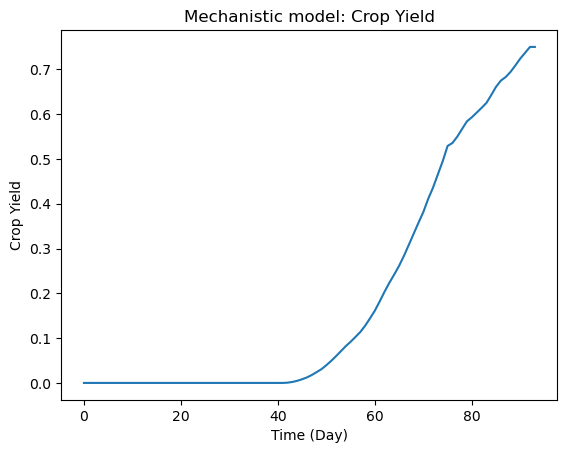

In [33]:
plt.plot(y)
plt.xlabel('Time (Day)')
plt.ylabel('Crop Yield')
plt.title('Mechanistic model: Crop Yield')
plt.show()

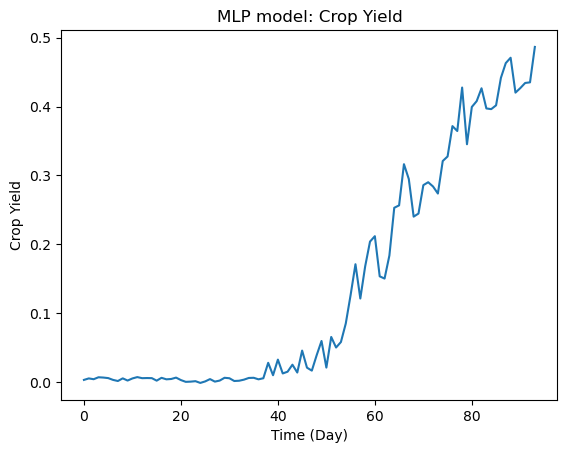

In [35]:
plt.plot(yhat)
plt.xlabel('Time (Day)')
plt.ylabel('Crop Yield')
plt.title('MLP model: Crop Yield')
plt.show()